In [119]:
#import stuff: for all the questions
%matplotlib inline
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import random

import pylab as py
import scipy as scipy
import numpy.fft as fft

<h1>Question 1</h1>

Text(0.5,1,'Sinesweep Spectogram')

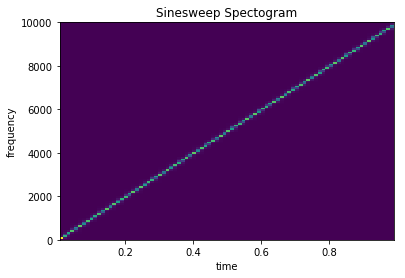

In [120]:
#given stuff
t=np.linspace(0,1,num=20000)#10000 to see alias error
y=sig.chirp(t,0,1,10000)
f, t, Sxx = sig.spectrogram(y, len(y))
plt.pcolormesh(t, f, Sxx)
plt.xlabel("time")
plt.ylabel("frequency")
plt.title("Sinesweep Spectogram")

Text(0.5,1,'Downsized sine sweep spectogram')

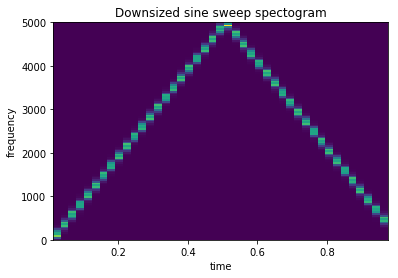

In [121]:
#3.
y_new=[];
for i in range(len(y)): 
    if (i%2==0):
        y_new.append(y[i])

y_new=np.array(y_new);
f, t, Sxx = sig.spectrogram(y_new, len(y_new))
plt.pcolormesh(t, f, Sxx)
plt.xlabel("time")
plt.ylabel("frequency")
plt.title("Downsized sine sweep spectogram")

2. The spectorgam is just increasing linearly (because the sine sweep is just increasing the frequency as time goes on).
3. Now the spectogram increases and then decreases in frequency, so it is a little different. I am not exactly sure why but I think it might have to do with aliasing error. The frequency is a sine sweep starts low and then increases so then if you're sampling enough you would catch the lower frequencies and the upper frequencies. However, if you decrease how often you sample (sampling every other) you would pick up only lower frequencies, and after some point miss the higher frequencies. This is supported because if you change your original number of samples (do t=np.linspace(0,1,num=10000)) you get this triangle looking thing that happened if you downsize. This also makes sense because 10000/2 =5000 which is why the bend in the frequency spectrum is at 5000Hz. After that sampling isn't at the Nyquist sampling nubmer.


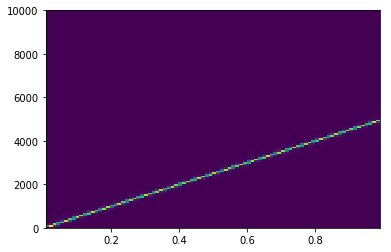

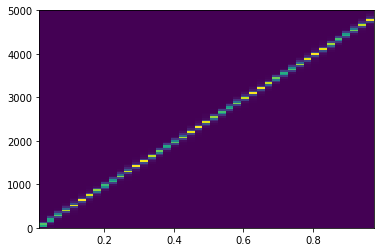

In [43]:
#4.
#do samething except now after filter we only have frequencies up to 5000 hz (changed sig.chirp)
t=np.linspace(0,1,num=20000)
y=sig.chirp(t,0,1,5000)

f, t, Sxx = sig.spectrogram(y, len(y))
plt.pcolormesh(t, f, Sxx)
plt.show()

        
#finally downsize again
y_new=[]
for i in range(len(y)): 
    if (i%2==0):
        y_new.append(y[i])
y_new=np.array(y_new);

f, t, Sxx = sig.spectrogram(y_new, len(y_new))
plt.pcolormesh(t, f, Sxx)
plt.show()

4. The results here further support my theory in 4 that is a problem with sampling. The error in the original plot occurred for frequencies greater than 5kHz so if we only look at lower frequencies then we could downsize the amount of samples we need without seeing much of a different graph because there would be no alias sampling error.

# Question 2

In [104]:
#1 2
x=np.random.rand()
y=np.random.rand()
print(x,y)
def inCirc(x,y):
    return ((x**2+y**2)**(.5))<=1

#3
if (inCirc(x,y)): print("YES! within the unit square!")
else: print("NO! not within unit square!")
   

0.5699669595616501 0.24976755850793286
YES! within the unit square!


For n= 100 , Pi is approximately:  3.52
For n= 200 , Pi is approximately:  3.02
For n= 500 , Pi is approximately:  3.304
For n= 1000 , Pi is approximately:  3.156
For n= 2000 , Pi is approximately:  3.1
For n= 5000 , Pi is approximately:  3.1624
For n= 10000 , Pi is approximately:  3.1252
For n= 100000 , Pi is approximately:  3.14788
Now for iterative:
For N= 100 , Pi is approximately: 3.141592653589793
For N= 200 , Pi is approximately: 3.141592653589793
For N= 500 , Pi is approximately: 3.141592653589793
For N= 1000 , Pi is approximately: 3.141592653589793
For N= 2000 , Pi is approximately: 3.141592653589793
For N= 5000 , Pi is approximately: 3.141592653589793
For N= 10000 , Pi is approximately: 3.141592653589793
For N= 100000 , Pi is approximately: 3.141592653589793
See the log errors of iterative solutio are all -infinity:  [-inf -inf -inf -inf -inf -inf -inf -inf]


/software/jupyterPy34-4.0.6/lib/python3.4/site-packages/ipykernel/__main__.py:45: RuntimeWarning: divide by zero encountered in log
/software/jupyterPy34-4.0.6/lib/python3.4/site-packages/ipykernel/__main__.py:46: RuntimeWarning: divide by zero encountered in log


Text(0,0.5,'N')

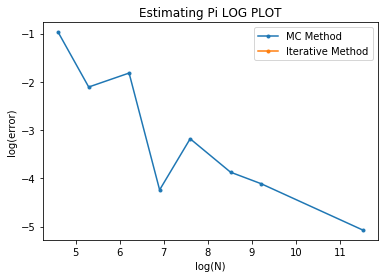

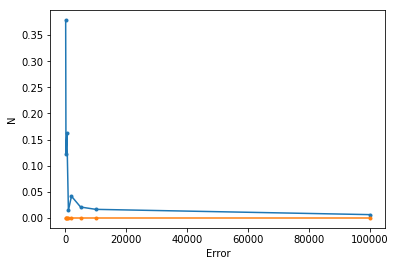

In [130]:
""" NOTE: The question asks for log plots but for iterative, my solution is so close to zero the log is -infinity
and therefore doesn't show up, so i did regular plots as well!

Also: the last N value for iterative method takes about 30 seconds or longer to run
"""

#4 5
print("Monte Carlo Estimation:")
N=[100,200,500,1000,2000,5000,10000,100000]
pis=[]
for n in N:
    m=0.0
    for i in range(n):
        if (inCirc(np.random.rand(),np.random.rand())): m+=1.0
    pis.append(m/n*4)
    print ("For n=",n,", Pi is approximately: ",(m/n*4))

#6
error=[]
for p in pis :
    error.append(abs(np.pi-p))
plt.plot(np.log(N),np.log(error),".-",label="MC Method")
plt.title("Estimating Pi LOG PLOT")
plt.ylabel("log(error)")
plt.xlabel("log(N)")

#7
print("Now for iterative:")

#iterative solution in 
pis_it=[]
err_it=[]
for n in N:
    ans=0
    for k in range(n):
        #ans+=np.math.factorial(k)/np.math.factorial(np.math.factorial(2*k+1))
        #this one is taking waaaay to long so let's try a different one
        ans+=1/(16**k)*(4/(8*k+1)-2/(8*k+4)-1/(8*k+5)-1/(8*k+6))
        #^these were taken from https://en.wikipedia.org/wiki/List_of_formulae_involving_%CF%80#Other_infinite_series

    pis_it.append(ans)
    print("For N=",n,", Pi is approximately: "+str(ans))

for p in pis_it:
    err_it.append(abs(np.pi-p))

print("See the log errors of iterative solution are all -infinity: ",np.log(err_it))
plt.plot(np.log(N),np.log(err_it),".-",label="Iterative Method")
plt.legend(loc="best")

plt.figure("Regular ")
plt.plot(N,error,".-",label="MC Method")
plt.plot(N,err_it,".-",label="Iterative Method")
plt.xlabel("Error")
plt.ylabel("N")

Seems like the iterative method takes longer to run. But it seems like a much more effective method. It has basically 0 error to begin with (even after 100 iterations) as seen in the graph.


# Question 3

40


Text(0,0.5,'magnitude')

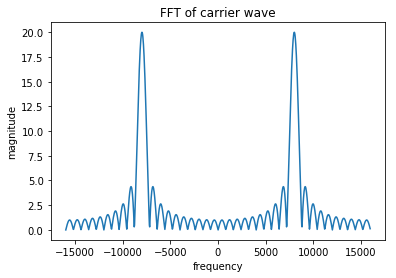

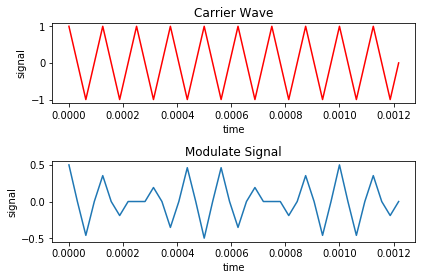

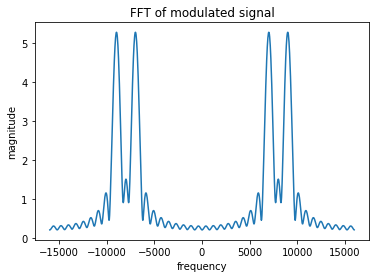

In [116]:
#1 2 3 
fs=32000 #sampling frequency
fc=8000 #carrier frequency

#t=np.linspace(0,1/fc*10,num=fs)
#t=np.arange(0,1/fc*10,fs)
t=np.arange(0,1/fc*10,1/fs)
xc=np.cos(fc*2*np.pi*t) #carrier wave
#print(len(xc))
#plt.plot(t,xc)
#plt.figure()

#4
N=1024
spectrum=abs(fft.fftshift(fft.fft(xc,N)))#find fourier transform
f_k=np.linspace(-fs/2, fs/2,len(spectrum))
plt.plot(f_k,spectrum)#plot it
plt.title("FFT of carrier wave")
plt.xlabel("frequency")
plt.ylabel("magnitude")
#peak occurs at zero


#5
xsignal=np.cos(1000*2*np.pi*t) #nmodulate signal
#print(len(xsignal))

#6
#for modulation index m=50%,m=ModulationAmplitude/CarrierAmplitude. 
#since carrier amplitude is 1, modulation amplitude would be .5
xmod=xc*xsignal*.5 #modulated signal
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].plot(t,xc,'r-')
axes[0].set_title("Carrier Wave")
axes[0].set_xlabel("time")
axes[0].set_ylabel("signal")
axes[1].plot(t,xmod)
axes[1].set_title("Modulate Signal")
axes[1].set_xlabel("time")
axes[1].set_ylabel("signal")
fig.tight_layout()


#7
plt.figure()
modulated_spectrum=fft.fftshift(abs(fft.fft(xmod,N)))
plt.plot(f_k,modulated_spectrum)
plt.title("FFT of modulated signal")
plt.xlabel("frequency")
plt.ylabel("magnitude")



7. Yes! The plots do look as exepected.The unmodulate signal in the frequency domain is two impulse functions and when modulated each imulse splits in two impules on either side of it half the height (1/4 the height in this case because of .5 modulation index.
Also the graphs look like they have noise and aren't perfect signals but if you increase the sampling frequency (fs=64000) in the first line, the graphs look better. 32kHz is just the frequency they told us to use.